In [1]:
#Importing Libraries:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading .csv file:
data = pd.read_csv("Sale_of_wheat.csv")

In [3]:
#Column names:
data.columns

Index(['Sales of Wheat in tons', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007'],
      dtype='object')

In [4]:
#Renaming a column:
data = data.rename(columns={'Sales of Wheat in tons': 'Country'})

In [5]:
#Updated column names:
data.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007'],
      dtype='object')

In [6]:
#No. of columns where data is 0:
print((data== 0).sum())

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       2
1997       1
1998       2
1999       1
2000       2
2001       2
2002       0
2003       3
2004       0
2005       0
2006       0
2007       0
dtype: int64


In [7]:
#Finding no. of null values in each column:
data.isnull().sum()

Country    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
dtype: int64

In [8]:
#Adding the average sales column:
cols = data.iloc[:, 1:19].replace(',', '', regex=True).astype(int)
sum1 = cols.sum(axis=1)
avg_sales = (sum1/18).astype(int)
avg_sales

0      353
1       36
2       47
3       12
4       25
      ... 
202    126
203     43
204    194
205    535
206    512
Length: 207, dtype: int32

In [9]:
#Adding the variance trend column:
col = (data.iloc[:,18]).str.replace(',', '').astype(int)
#col = col.replace(0,1)
var_trend = (((col- avg_sales)/avg_sales)*100).astype(int)
var_trend

0     -32
1     -38
2      19
3     -58
4     -24
       ..
202   -80
203   -27
204   -32
205   -27
206    39
Length: 207, dtype: int32

In [10]:
df = pd.DataFrame({'Country':data['Country'],'Avg_Sale':avg_sales,'Var_Trend':var_trend})
df.head()

,Country,Avg_Sale,Var_Trend
0,Afghanistan,353,-32
1,Albania,36,-38
2,Algeria,47,19
3,American Samoa,12,-58
4,Andorra,25,-24


###### Splitting the data in two seperate groups 

In [11]:
z = (df.iloc[:,0].values)
x = (df.iloc[:,1:3].values)


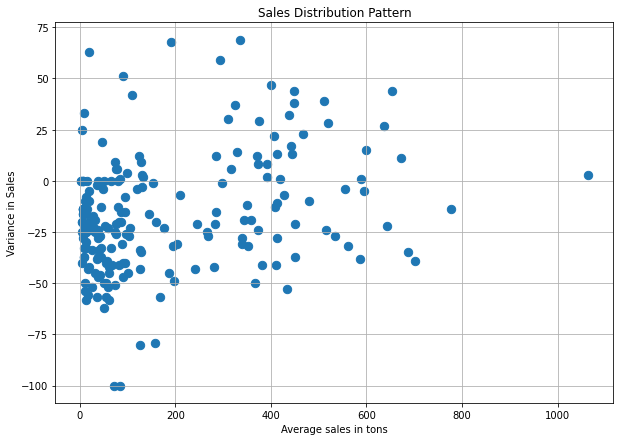

In [12]:
# Distribution before clusturing
plt.figure(figsize=(10,7))
plt.scatter(x[:,0],x[:,1],s=70)
plt.xlabel('Average sales in tons')
plt.ylabel('Variance in Sales')
plt.title('Sales Distribution Pattern')
plt.grid()
plt.show()

###### Applying Label Encoding to Country column i.e. column 0 since it is a character/string

In [13]:
from sklearn.preprocessing import LabelEncoder

# Convert the first column to numeric using LabelEncoder
labelencoder = LabelEncoder()
z = labelencoder.fit_transform(z)

In [14]:
#The country column after performing encoding 
z

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  48,  49,  50,  51,  47,  96,
        43,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150,  97, 119, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 108, 18

###### Splitting the data 

In [15]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,z,test_size=0.2)

The test_size 0.2 signifies that 20% of data is test data while the rest 80% is train data.

###### Applying Standard scaler

In [17]:
#from sklearn.preprocessing import StandardScaler 
#sc = StandardScaler() 

#x = sc.fit_transform(x) 
#x_train = sc.fit_transform(x_train) 
#x = sc.transform(x) 

Standard scaler applied to fit and transform the data according to the model .

###### Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [19]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(x_test)
    wcss.append(kmeans.inertia_)

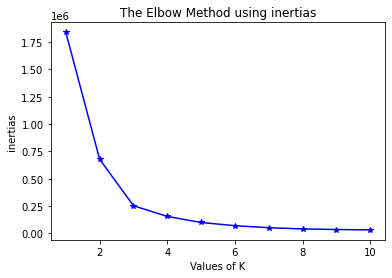

In [20]:
#Plotting the elbow chart
plt.plot(range(1,11), wcss,'b*-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using inertias')
plt.show()

No. of clusters is 3

In [21]:
# Predicting the Clusters Number for each country
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3,init='k-means++')

In [22]:
# predicting the no. of cluster 
y_kmeans =kmeans.fit_predict(x)
y_kmeans

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 1])

In [23]:
# Appending the cluster  numbers in dataframeto identify each country with a cluster number.
df.reset_index(drop=True, inplace=True)
pd.DataFrame(y_kmeans).reset_index(drop=True, inplace=True)
result_df = pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)
result_df.rename(columns = {0:'Cluster'}, inplace = True)
result_df

,Country,Avg_Sale,Var_Trend,Cluster
0,Afghanistan,353,-32,2
1,Albania,36,-38,0
2,Algeria,47,19,0
3,American Samoa,12,-58,0
4,Andorra,25,-24,0
...,...,...,...,...
202,Wallis et Futuna,126,-80,0
203,West Bank and Gaza,43,-27,0
204,Yemen,194,-32,0
205,Zambia,535,-27,1


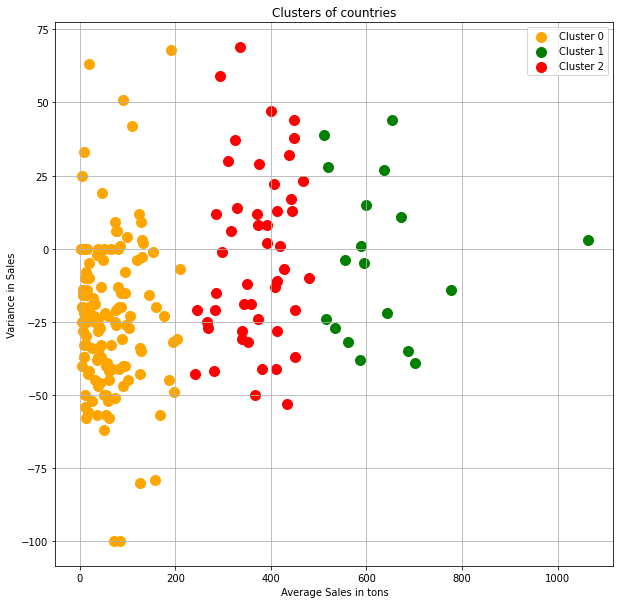

In [24]:
plt.figure(figsize=(10,10))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='orange', label='Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='red', label='Cluster 2')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='blue', label='Cluster 4')

plt.title('Clusters of countries') 
plt.xlabel('Average Sales in tons')  
plt.ylabel('Variance in Sales')  
plt.legend()
plt.grid()
plt.show()

The company should focus on countries in cluster 0 (orange dots)  and then on cluster 2(red dots ).  These countries have been consistently providing business of good scale. 

In [25]:
grouped = result_df.groupby('Cluster')

def sort_group(group):
    return group.sort_values(by='Var_Trend', ascending=True)

sorted_df = grouped.apply(sort_group).reset_index(drop=True)
sorted_df.to_csv('Sorted_Data.csv')
sorted_df

,Country,Avg_Sale,Var_Trend,Cluster
0,Niue,83,-100,0
1,Tokelau,71,-100,0
2,Wallis et Futuna,126,-80,0
3,Nauru,158,-79,0
4,Hungary,51,-62,0
...,...,...,...,...
202,Botswana,448,38,2
203,Burundi,449,44,2
204,Rwanda,400,47,2
205,Equatorial Guinea,294,59,2
